<a href="https://colab.research.google.com/github/PartyForYou/MachineLearningProgramming/blob/main/%EC%8B%A4%EC%8A%B5_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

WINE 데이터 세트를 이용하여
- 결정트리,
- 랜덤포레스트,
- 에스트라 트리,
- 그레디언트 부스팅,
- 히스토그램기반 그래디언트 부스팅

모델을 만들고 최적화

**데이터 준비**

In [10]:
import pandas as pd

wine = pd.read_csv('https://bit.ly/wine_csv_data')

data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()

from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    data, target, test_size=0.2, random_state=42)

sub_input, val_input, sub_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2, random_state=42)

# 정규화
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)

train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

## 결정트리

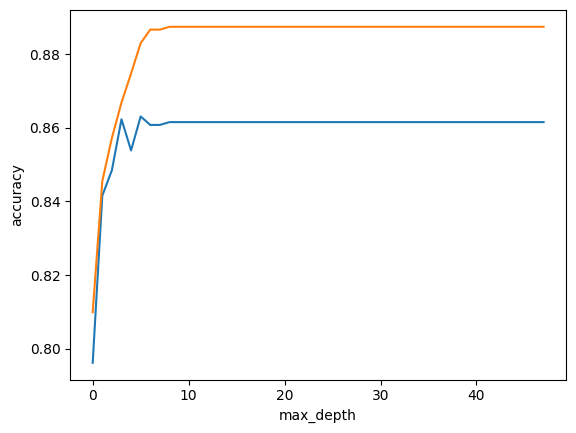

0.8668462574562248
0.8623076923076923


In [11]:
from sklearn.tree import DecisionTreeClassifier

train_score = []
test_score = []
for i in range(2, 50):
  model = DecisionTreeClassifier(max_depth = i, random_state=42, min_impurity_decrease=0.0005)
  model.fit(train_input, train_target)
  train_score.append(model.score(train_input, train_target))
  test_score.append(model.score(test_input, test_target))
import matplotlib.pyplot as plt
plt.plot(test_score)
plt.plot(train_score)
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.show()

model = DecisionTreeClassifier(max_depth = 5, min_impurity_decrease=0.0005)
model.fit(train_input, train_target)

print(model.score(train_input, train_target))
print(model.score(test_input, test_target))


## 랜덤 포레스트

In [9]:
import numpy as np
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier

from scipy.stats import uniform, randint
params = {'min_impurity_decrease': uniform(0.0001, 0.001),
          'max_depth': randint(20, 50),
          'min_samples_split': randint(2, 25),
          'min_samples_leaf': randint(1, 25),
          }


from sklearn.model_selection import RandomizedSearchCV

gs = RandomizedSearchCV(RandomForestClassifier(random_state=42), params,
                        n_iter=100, n_jobs=-1, random_state=42)


gs.fit(train_input, train_target)
print(gs.best_params_)
dt = gs.best_estimator_
print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))


{'max_depth': 36, 'min_impurity_decrease': 0.00013734818874921442, 'min_samples_leaf': 6, 'min_samples_split': 16}
0.9043679045603232
0.8676923076923077


## 에스트라 트리

In [12]:
from sklearn.ensemble import ExtraTreesClassifier

params = {'min_impurity_decrease': uniform(0.0001, 0.001),
          'max_depth': randint(20, 50),
          'min_samples_split': randint(2, 25),
          'min_samples_leaf': randint(1, 25),
          }

gs = RandomizedSearchCV(ExtraTreesClassifier(random_state=42), params,
                        n_iter=100, n_jobs=-1, random_state=42)


gs.fit(train_input, train_target)
print(gs.best_params_)
dt = gs.best_estimator_
print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

{'max_depth': 26, 'min_impurity_decrease': 0.0008965429868602329, 'min_samples_leaf': 15, 'min_samples_split': 12}
0.7579372715027901
0.7376923076923076


## 그레디언트 부스팅

In [15]:
from sklearn.ensemble import GradientBoostingClassifier

params = {'learning_rate': uniform(0.0001, 0.001),
          'max_depth': randint(20, 30)
          }

# gb = GradientBoostingClassifier(n_estimators=500, learning_rate=0.2, random_state=42)


gs = RandomizedSearchCV(GradientBoostingClassifier(random_state=42), params,
                        n_iter=10, n_jobs=-1, random_state=42)
scores = cross_validate(gs, train_input, train_target, return_train_score=True, n_jobs=-1)


gs.fit(train_input, train_target)
print(gs.best_params_)
dt = gs.best_estimator_
print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

{'learning_rate': 0.0004745401188473625, 'max_depth': 27}
0.7579372715027901
0.7376923076923076


## 히스토그램기반 그래디언트 부스팅

In [17]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.inspection import permutation_importance

params = {'learning_rate': uniform(0.0001, 0.001),
          'max_depth': randint(20, 30)
          }


hgb = RandomizedSearchCV(HistGradientBoostingClassifier(random_state=42), params,
                        n_iter=100, n_jobs=-1, random_state=42)
hgb.fit(train_input, train_target)
result = permutation_importance(hgb, test_input, test_target, n_repeats=10,
                                random_state=42, n_jobs=-1)
print(hgb.score(test_input, test_target))
print(hgb.score(test_input, test_target))

print(hgb.best_params_)

0.7376923076923076
0.7376923076923076
{'learning_rate': 0.0004745401188473625, 'max_depth': 27}
